In [201]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
import math

%matplotlib inline

In [202]:
LAT_TO_M = 111176.46161222676
LONG_TO_M = 75643.46720256942
GEO_MEAN_WINDOW = 5

In [203]:
df = pd.read_csv('towork1.csv')

In [204]:
df['lat'] = pd.rolling_mean(df['lat'], GEO_MEAN_WINDOW)
df['long'] = pd.rolling_mean(df['long'], GEO_MEAN_WINDOW)

/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).mean()
  """Entry point for launching an IPython kernel.
/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).mean()
  


In [205]:
df['dt'] = [datetime.datetime.fromtimestamp(x/1000) for x in df['timestamp'].values]
df['Ddt'] = df.diff()['dt']
df['Dlat'] = df.diff()['lat']
df['Dlong'] = df.diff()['long']


df['Dlat'] = df['Dlat'] * LAT_TO_M
df['Dlong'] = df['Dlong'] * LONG_TO_M
df['d_euc'] = [math.sqrt(a**2 + b**2) for (a, b) in zip(df['Dlat'].values, df['Dlong'].values)]
df['a_sum'] = [math.sqrt(x**2 + y**2 + x**2) for (x, y, z) in zip(df['ax'], df['ay'], df['az'])]





In [206]:
df['Ddt'][0] = 1
df['d_euc'][0] = 0
df['speed'] = [(d / (int(t) / 1000 / 1000 / 1000)) for (d, t) in zip(df['d_euc'].values, df['Ddt'].values)]
df['speed'] = df['speed'] * 3.6
df['Dspeed'] = df.diff()['speed']
df['a_calc'] = [v/(float(t)/1000/1000/1000) for v,t in zip(df['Dspeed'].values, df['Ddt'].values)]
df['2a_diff'] = np.sqrt(df['a_calc']**2) - np.sqrt(df['a_sum']**2)





/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [178]:
df[['dt','Ddt','d_euc','speed', 'a_calc', 'a_sum', '2a_diff']][400:450]

,dt,Ddt,d_euc,speed,a_calc,a_sum,2a_diff
400,2017-09-15 11:09:35.355,00:00:01.090000,7.597037,25.091132,-3.211275,4.395755,-1.184480
401,2017-09-15 11:09:36.225,00:00:00.870000,7.088682,29.332476,4.875108,1.853237,3.021872
402,2017-09-15 11:09:38.353,00:00:02.128000,4.043247,6.840079,-10.569736,5.328291,5.241445
403,2017-09-15 11:09:39.303,00:00:00.950000,8.177418,30.988110,25.418980,3.661256,21.757724
404,2017-09-15 11:09:40.436,00:00:01.133000,7.463507,23.714584,-6.419705,5.773856,0.645849
405,2017-09-15 11:09:41.394,00:00:00.958000,6.330760,23.789913,0.078632,4.055727,-3.977095
406,2017-09-15 11:09:42.405,00:00:01.011000,7.790319,27.740007,3.907116,3.902899,0.004217
407,2017-09-15 11:09:43.233,00:00:00.828000,8.039785,34.955587,8.714468,2.494634,6.219835
408,2017-09-15 11:09:44.294,00:00:01.061000,7.681104,26.062181,-8.382098,1.226075,7.156024
409,2017-09-15 11:09:47.215,00:00:02.921000,7.681104,9.466612,-5.681468,2.202943,3.478525


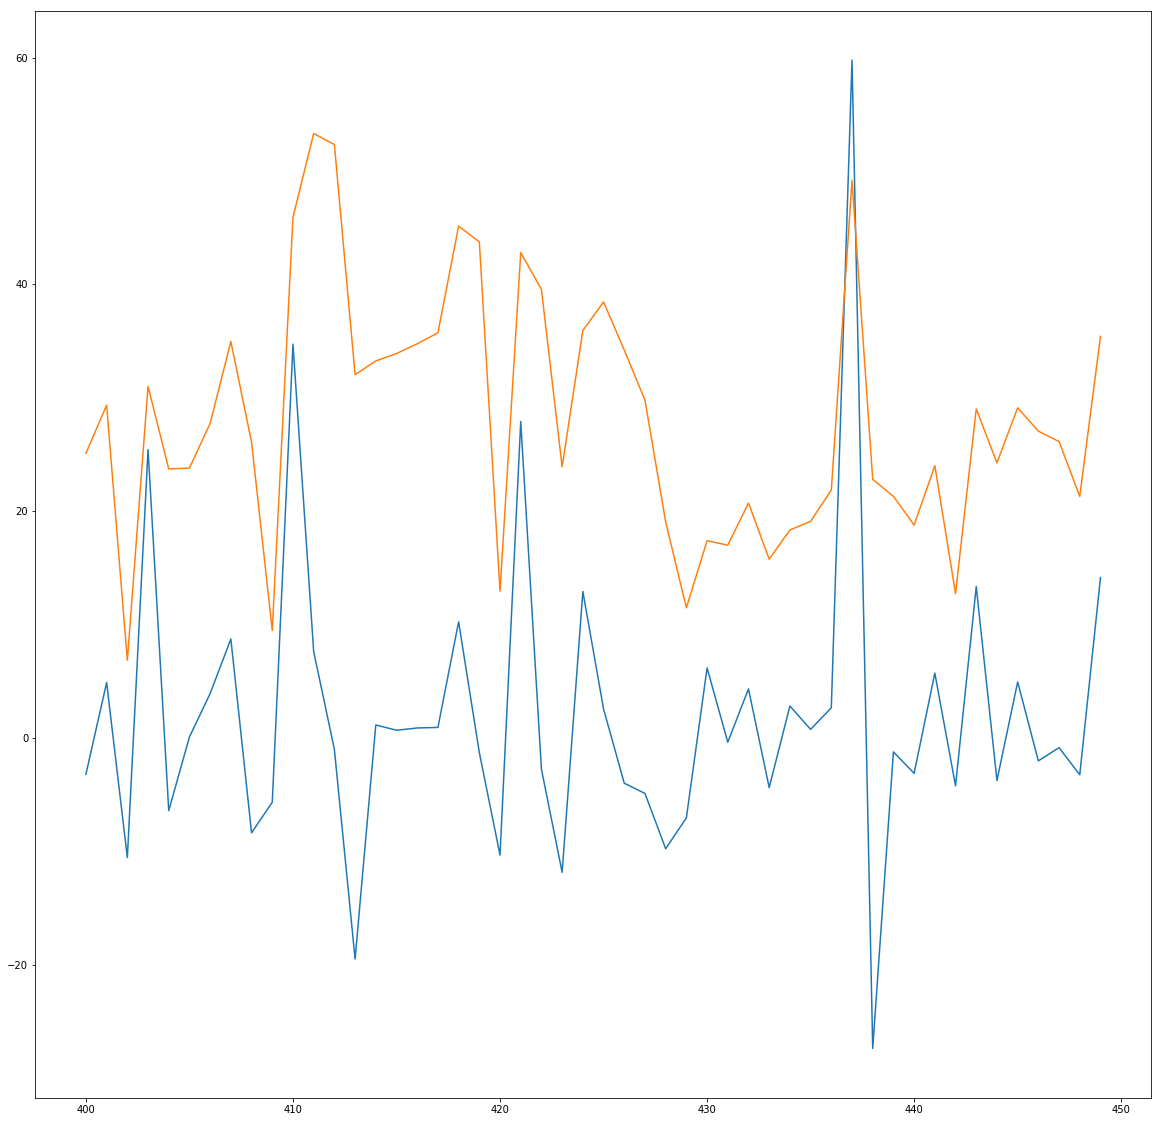

In [183]:
#plt.plot(df['a_sum'])
plt.figure(figsize=(20,20))
#plt.plot(df['2a_diff'][400:450])
plt.plot(df['a_calc'][400:450])
plt.plot(df['speed'][400:450])



/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()
  """Entry point for launching an IPython kernel.


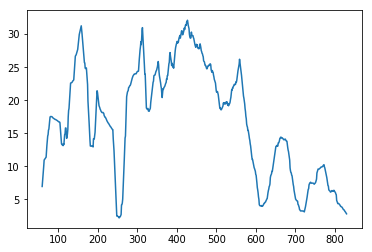

In [180]:
plt.plot(pd.rolling_mean(df['speed'],50))

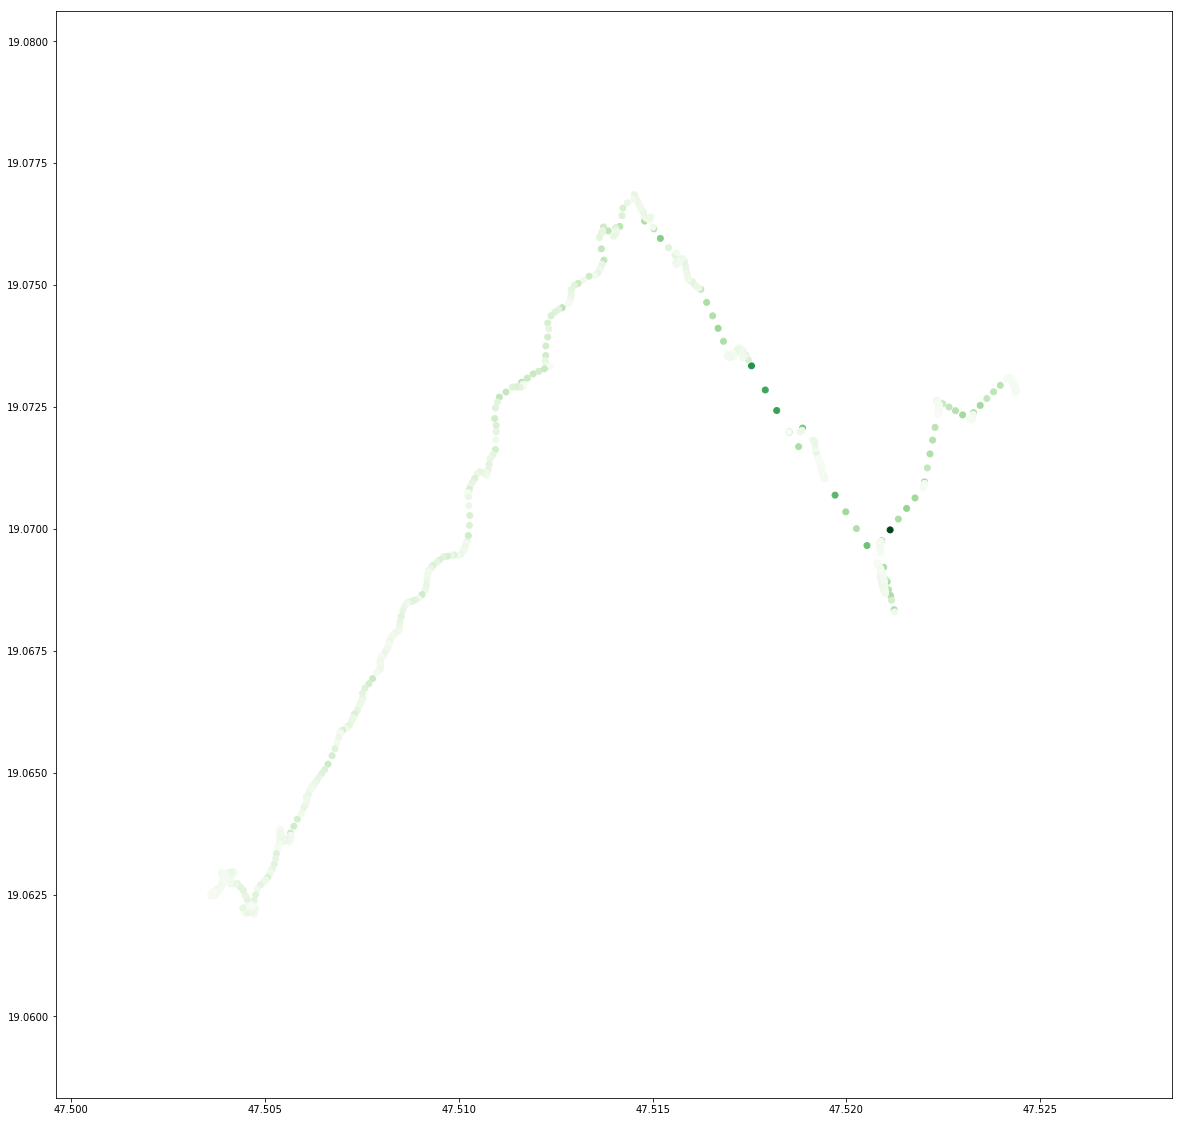

In [207]:
plt.figure(figsize=(20,20))
plt.scatter(df['lat'].values,df['long'].values, c=df['speed'].values, cmap='Greens')

# Kalman filtering

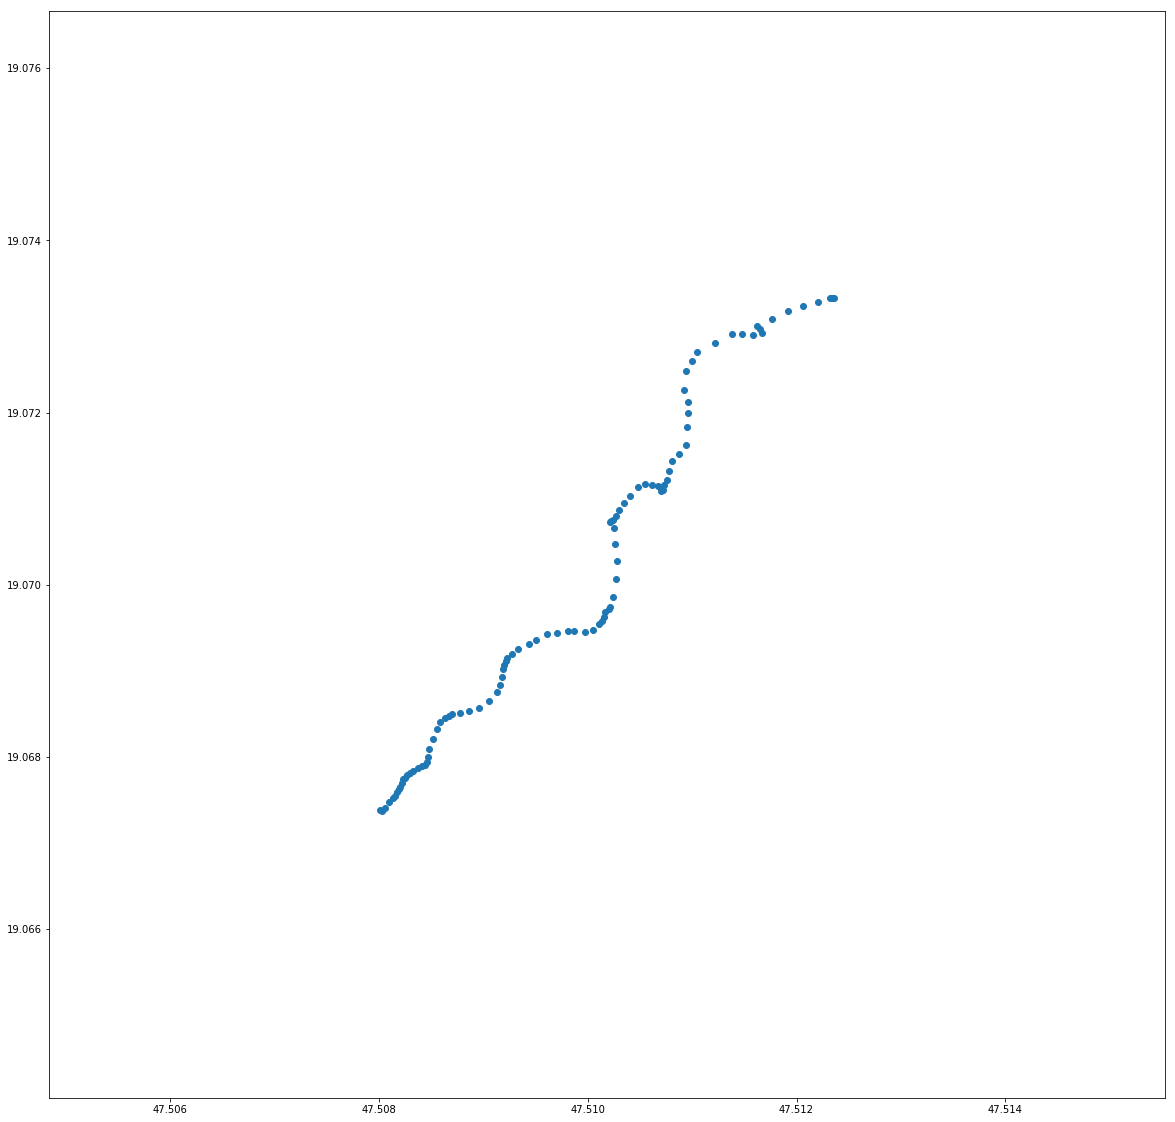

In [213]:
plt.figure(figsize=(20,20))
slice = df[400:500]
plt.scatter(slice['lat'].values, slice['long'].values)

In [215]:
slice[['Ddt','d_euc','speed', 'a_calc', 'a_sum', '2a_diff']]

,Ddt,d_euc,speed,a_calc,a_sum,2a_diff
400,00:00:01.090000,4.907552,16.208428,0.708003,4.395755,-3.687752
401,00:00:00.870000,2.141553,8.861600,-8.444631,1.853237,6.591394
402,00:00:02.128000,1.777002,3.006207,-2.751594,5.328291,-2.576696
403,00:00:00.950000,17.138062,64.944236,65.197925,3.661256,61.536669
404,00:00:01.133000,16.712550,53.102542,-10.451628,5.773856,4.677772
405,00:00:00.958000,16.709907,62.792969,10.115268,4.055727,6.059542
406,00:00:01.011000,17.704945,63.044313,0.248610,3.902899,-3.654289
407,00:00:00.828000,17.704945,76.978020,16.828148,2.494634,14.333515
408,00:00:01.061000,4.206502,14.272769,-59.100142,1.226075,57.874068
409,00:00:02.921000,4.081915,5.030775,-3.163983,2.202943,0.961040


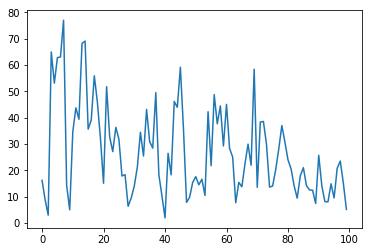

In [216]:
plt.plot(slice['speed'].values)

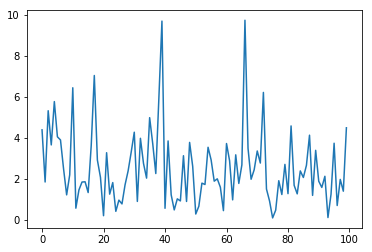

In [217]:
plt.plot(slice['a_sum'].values)